<a href="https://colab.research.google.com/github/raz0208/City-Person-Dataset-EDA/blob/main/CityPersonDatasetEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CityPerson Dataset EDA (Exploratory Data Analysis)**
A complete EDA (Exploratory Data Analysis) for CityPerson dataset

## Used Dataset:


*   gtFine_trainvaltest
*   gtFinePanopticParts_trainval

## Step 1: Extract and read the datasets

In [1]:
# Instal Required Libraries
import zipfile
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import numpy as np
import pandas as pd

In [2]:
# Dataset zip files path from Google Drive
gtFine = '/content/drive/MyDrive/CityPersonDataset/gtFine_trainvaltest.zip'
gtFinePanopticParts = '/content/drive/MyDrive/CityPersonDataset/gtFinePanopticParts_trainval.zip'

gtFine_ExtPath = '/content/CityPersonDataset/gtFine_trainvaltest'
gtFinePano_ExtPath = '/content/CityPersonDataset/gtFinePanopticParts_trainval'

In [3]:
# Extracting files function
def extract_zip(file_path, extract_path):
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Extract both datasets zip files
extract_zip(gtFine, gtFine_ExtPath)
extract_zip(gtFinePanopticParts, gtFinePano_ExtPath)

## Dataset Structure:

1.   gtFine_trainvaltest
  *   Contains PNG and JSON files.
  *   Organized by:
       * Train, validation, and test folders.
  *   Files Type:
      * *_color.png: Color-coded images for segmentation.
      * *_instanceIds.png: Encoded image masks where each pedestrian is represented with a unique ID.
      * *_labelIds.png: Encoded image masks for class labels.
      * *_polygons.json: Contains polygonal annotations for semantic segmentation, instance
2. gtFinePanopticParts_trainval:
    * Contains TIF files.
    * Organized similarly to gtFine_trainvaltest.
    * File type:
      * *_gtFinePanopticParts.tif: Panoptic segmentation with part-level annotations (e.g., parts of a pedestrian like arms or legs).

In [4]:
# List the extracted content from both datasets
gtFine_Files = os.listdir(gtFine_ExtPath)
gtFinepano_Files = os.listdir(gtFinePano_ExtPath)

gtFine_Files, gtFinepano_Files

(['README', 'license.txt', 'gtFine'],
 ['README_panopticParts.md', 'gtFinePanopticParts', 'license.txt'])

In [5]:
# Path to core folder
gtFine_CorePath = os.path.join(gtFine_ExtPath, 'gtFine')
gtFinePano_CorePath = os.path.join(gtFinePano_ExtPath, 'gtFinePanopticParts')

# List driectories inside core folders
gtFine_Dirs = os.listdir(gtFine_CorePath) if os.path.exists(gtFine_CorePath) else []
gtFinePano_Dirs = os.listdir(gtFinePano_CorePath) if os.path.exists(gtFinePano_CorePath) else []

gtFine_Dirs, gtFinePano_Dirs

(['test', 'val', 'train'], ['val', 'train'])

In [6]:
##### SIMPLE IMPLEMENTATION

# # Listing the sample files from the 'train' directory if it exists in both datasets
# gtfine_trainSample = os.listdir(os.path.join(gtFine_CorePath, 'train')) if 'train' in gtFine_Dirs else []
# gtFinePano_trainSample = os.listdir(os.path.join(gtFinePano_CorePath, 'train')) if 'train' in gtFinePano_Dirs else []

# gtFine_Dirs, gtfine_trainSample[:], gtFinePano_Dirs, gtFinePano_trainSample[:]

######

# Define the subdirectories
subdirs = gtFine_Dirs #["train", "val", "test"]

# Initialize dictionaries to store samples from each subdirectory
gtFine_CityFolders = {}
gtFinePano_CityFolders = {}

# Process each subdirectory
for subdir in subdirs:
    gtFine_CityFolders[subdir] = os.listdir(os.path.join(gtFine_CorePath, subdir)) if subdir in gtFine_Dirs else []
    gtFinePano_CityFolders[subdir] = os.listdir(os.path.join(gtFinePano_CorePath, subdir)) if subdir in gtFinePano_Dirs else []

# Output the first few files for each subdirectory
gtFine_CityFolders_Preview = {key: value[:] for key, value in gtFine_CityFolders.items()}
gtFinePano_CityFolders_Preview = {key: value[:] for key, value in gtFinePano_CityFolders.items()}

gtFine_CityFolders_Preview, gtFinePano_CityFolders_Preview

({'test': ['bonn', 'mainz', 'berlin', 'munich', 'bielefeld', 'leverkusen'],
  'val': ['frankfurt', 'lindau', 'munster'],
  'train': ['bremen',
   'krefeld',
   'dusseldorf',
   'hamburg',
   'hanover',
   'bochum',
   'monchengladbach',
   'aachen',
   'tubingen',
   'erfurt',
   'weimar',
   'darmstadt',
   'jena',
   'ulm',
   'cologne',
   'zurich',
   'strasbourg',
   'stuttgart']},
 {'test': [],
  'val': ['frankfurt', 'lindau', 'munster'],
  'train': ['bremen',
   'krefeld',
   'dusseldorf',
   'hamburg',
   'hanover',
   'bochum',
   'monchengladbach',
   'aachen',
   'tubingen',
   'erfurt',
   'weimar',
   'darmstadt',
   'jena',
   'ulm',
   'cologne',
   'zurich',
   'strasbourg',
   'stuttgart']})

## Files structure

For example: the file structure in the "bochum" city directory confirms the expected dataset formats and relationships:

1. gtFine Dataset (bochum):
    - Files include:
       - Color-coded images (e.g., bochum_000000_000313_gtFine_color.png).
       - Instance masks (e.g., bochum_000000_000313_gtFine_instanceIds.png).
       - Label masks (e.g., bochum_000000_000313_gtFine_labelIds.png).
       - Polygon annotations (e.g., bochum_000000_000313_gtFine_polygons.json).

2. gtFinePanopticParts Dataset (bochum):
    - Files include:
      - Panoptic segmentation with part-level detail (e.g., bochum_000000_000313_gtFinePanopticParts.tif).

## Observed Relationship:
- The filenames match across datasets, indicating alignment.
  - For example: bochum_000000_000313_gtFinePanopticParts.tif aligns with the corresponding files in gtFine for color, instance, label, and polygons.

In [7]:
# Select 3 cities name randomly from 'train' folder to check files
selected_cities = random.sample(gtFine_CityFolders['train'], 3)

# List files for each selected city
gtFine_city_files = {}
gtFinePano_city_files = {}
gtFine_city_files_sorted = {}
gtFinePano_city_files_sorted = {}

for city in selected_cities:
    gtFine_city_path = os.path.join(gtFine_CorePath, "train", city)
    gtFinePano_city_path = os.path.join(gtFinePano_CorePath, "train", city)

    gtFine_city_files[city] = sorted(os.listdir(gtFine_city_path) if os.path.exists(gtFine_city_path) else [])
    gtFinePano_city_files[city] = sorted(os.listdir(gtFinePano_city_path) if os.path.exists(gtFinePano_city_path) else [])

    gtFine_city_files_sorted[city] = gtFine_city_files[city][:4]
    gtFinePano_city_files_sorted[city] = gtFinePano_city_files[city][:1]

# Preview sample files for each city
gtFine_city_files_sorted, gtFinePano_city_files_sorted

({'jena': ['jena_000000_000019_gtFine_color.png',
   'jena_000000_000019_gtFine_instanceIds.png',
   'jena_000000_000019_gtFine_labelIds.png',
   'jena_000000_000019_gtFine_polygons.json'],
  'hamburg': ['hamburg_000000_000042_gtFine_color.png',
   'hamburg_000000_000042_gtFine_instanceIds.png',
   'hamburg_000000_000042_gtFine_labelIds.png',
   'hamburg_000000_000042_gtFine_polygons.json'],
  'strasbourg': ['strasbourg_000000_000065_gtFine_color.png',
   'strasbourg_000000_000065_gtFine_instanceIds.png',
   'strasbourg_000000_000065_gtFine_labelIds.png',
   'strasbourg_000000_000065_gtFine_polygons.json']},
 {'jena': ['jena_000000_000019_gtFinePanopticParts.tif'],
  'hamburg': ['hamburg_000000_000042_gtFinePanopticParts.tif'],
  'strasbourg': ['strasbourg_000000_000065_gtFinePanopticParts.tif']})

### Visualize sample images and annotations

The visualization showcases the following:

1. Color Image: A standard RGB image representing the scene.
2. Instance Mask: Encoded segmentation where each pedestrian instance is uniquely labeled.
3. Panoptic Segmentation: A TIF file providing part-level segmentation for pedestrians (e.g., distinguishing arms, legs, etc.).

This confirms the alignment between datasets and their usability for pedestrian detection tasks.

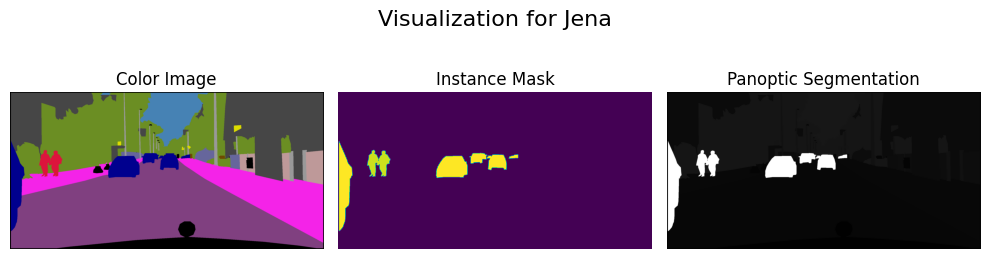

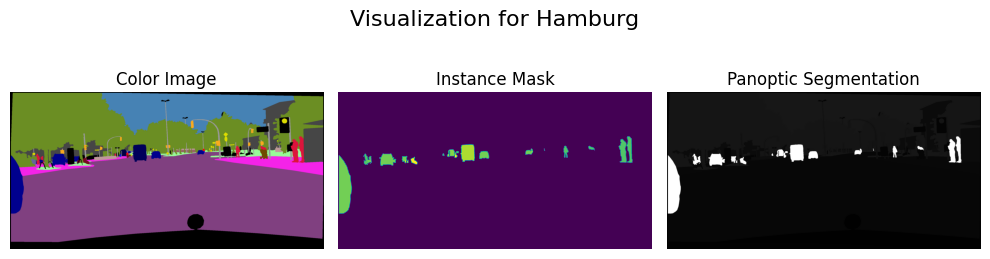

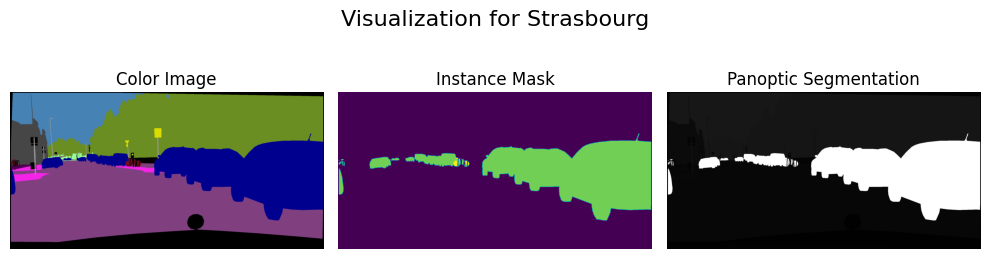

In [8]:
# File paths for sample images from selected cities
for city in selected_cities:
  # Geting files path
  color_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][0]) # '_gtFine_color.png'
  instance_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][1]) # '_gtFine_instanceIds.png'
  panoptic_image_path = os.path.join('/content/CityPersonDataset/gtFinePanopticParts_trainval/gtFinePanopticParts/train/', city, gtFinePano_city_files_sorted[city][0]) # '_gtFinePanopticParts.tif'

  # Loading images
  color_image = Image.open(color_image_path)
  instance_image = Image.open(instance_image_path)
  panoptic_image = Image.open(panoptic_image_path)

  # Display the images
  fig, axs = plt.subplots(1, 3, figsize=(10, 3))
  fig.suptitle(f"Visualization for {city.capitalize()}", fontsize=16)

  axs[0].imshow(color_image)
  axs[0].set_title('Color Image')
  axs[0].axis('off')

  axs[1].imshow(instance_image, cmap='viridis')
  axs[1].set_title('Instance Mask')
  axs[1].axis('off')

  axs[2].imshow(panoptic_image, cmap='viridis')
  axs[2].set_title('Panoptic Segmentation')
  axs[2].axis('off')

  plt.tight_layout()
  plt.show()

In [9]:
# Count images in each city folder
def count_images_in_cities(base_path):
    city_counts = {}
    if os.path.exists(base_path):
        for city in os.listdir(base_path):
            city_path = os.path.join(base_path, city)
            if os.path.isdir(city_path):
                image_count = len(os.listdir(city_path))
                city_counts[city] = (image_count, int(image_count / 4))
    return city_counts

# Count images in 'train' and 'val' splits for both datasets
gtFine_train_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "train"))
gtFine_val_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "val"))
gtFine_test_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "test"))
gtFinePano_train_counts = count_images_in_cities(os.path.join(gtFinePano_CorePath, "train"))
gtFinePano_val_counts = count_images_in_cities(os.path.join(gtFinePano_CorePath, "val"))

# Create PANDAS dataframe
print("Name of the cities and number of unique IDs per city in gtFine dataset:")
# Save city image counts for gtFine dataset in pandas DataFrame
gtFine_city_trainImg_pd = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_train_counts.items()], columns=["City", "FileCounts", "ImgPerUniqueID"])
gtFine_city_valImg_pd = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_val_counts.items()], columns=["City", "FileCounts", "ImgPerUniqueID"])
gtFine_city_testImg_pd = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_test_counts.items()], columns=["City", "FileCounts", "ImgPerUniqueID"])

# Print the gtFine DataFrame
print(gtFine_city_trainImg_pd)
print(gtFine_city_valImg_pd)
print(gtFine_city_testImg_pd)

print("\nName of the cities and number of unique IDs per city in gtFinePanopticParts dataset:")
# Save city image counts for gtFinePanopticParts dataset in pandas DataFrame
gtFinePano_city_trainImg_pd = pd.DataFrame([(city, count[0]) for city, count in gtFinePano_train_counts.items()], columns=["City", "ImageCounts"])
gtFinePano_city_valImg_pd = pd.DataFrame([(city, count[0]) for city, count in gtFinePano_val_counts.items()], columns=["City", "ImageCounts"])

# Print the gtFinePanopticParts DataFrame
print(gtFinePano_city_trainImg_pd)
print(gtFinePano_city_valImg_pd)

Name of the cities and number of unique IDs per city in gtFine dataset:
               City  Image Count  ImgPerUniqueID
0            bremen         1264             316
1           krefeld          396              99
2        dusseldorf          884             221
3           hamburg          992             248
4           hanover          784             196
5            bochum          384              96
6   monchengladbach          376              94
7            aachen          696             174
8          tubingen          576             144
9            erfurt          436             109
10           weimar          568             142
11        darmstadt          340              85
12             jena          476             119
13              ulm          380              95
14          cologne          616             154
15           zurich          488             122
16       strasbourg         1460             365
17        stuttgart          784             1

Visualizing gtFine dataset image counts...


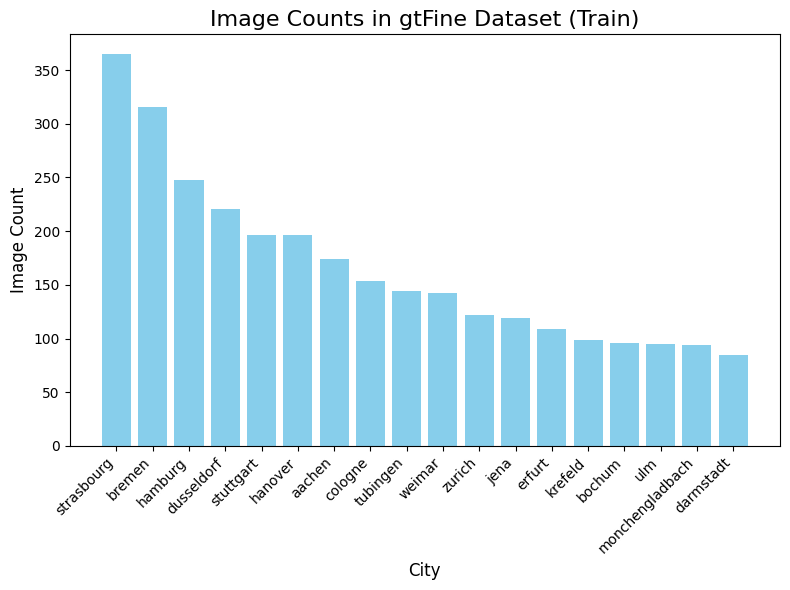

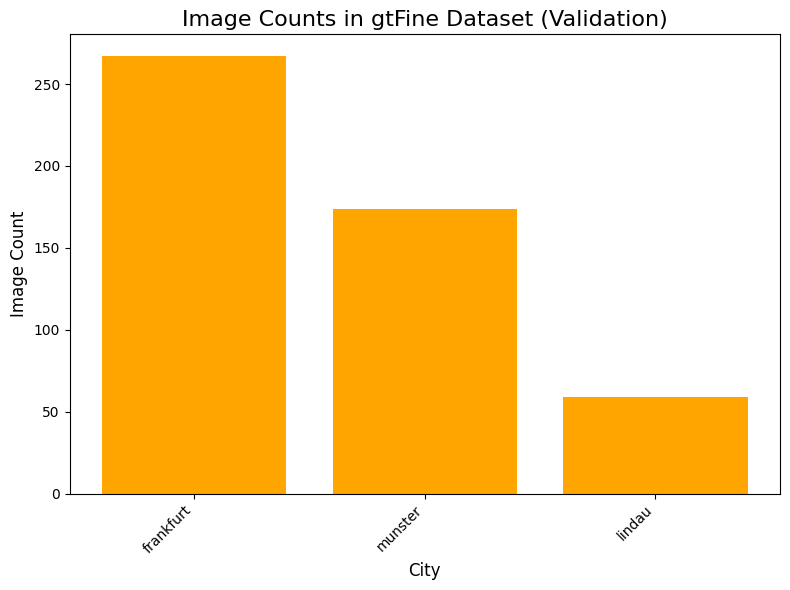

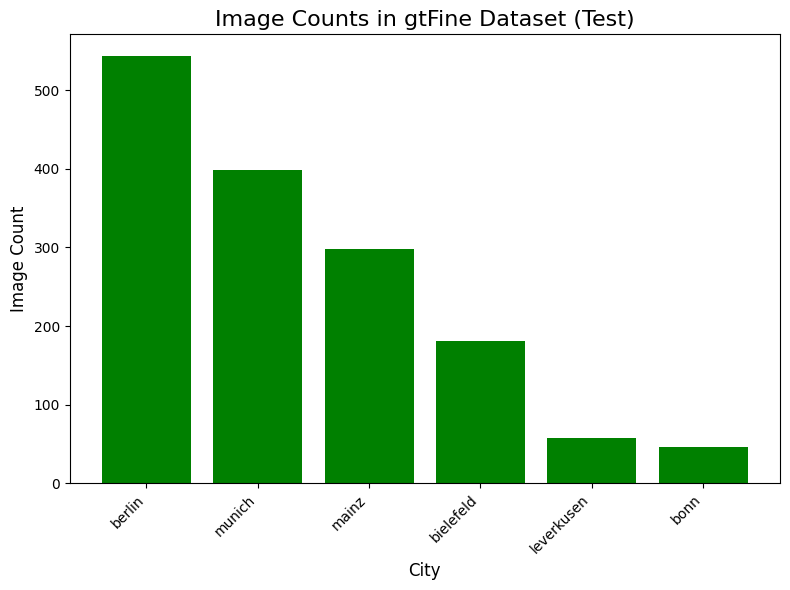

In [10]:
# Visualize cities name and the number of images per each unique ID
def gtFine_plot_city_counts(data, title, color):
    data.sort_values(by="FileCounts", ascending=False, inplace=True)
    plt.figure(figsize=(8, 6))
    plt.bar(data["City"], data["ImgPerUniqueID"], color=color)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("FileCounts", fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

# Plotting for gtFine dataset
print("Visualizing gtFine dataset file counts...")
gtFine_plot_city_counts(gtFine_city_trainImg_count, "File counts in gtFine Dataset (Train)", "skyblue")
gtFine_plot_city_counts(gtFine_city_valImg_count, "File counts in gtFine Dataset (Validation)", "orange")
gtFine_plot_city_counts(gtFine_city_testImg_count, "File counts in gtFine Dataset (Test)", "green")

Visualizing gtFinePanopticParts dataset image counts...


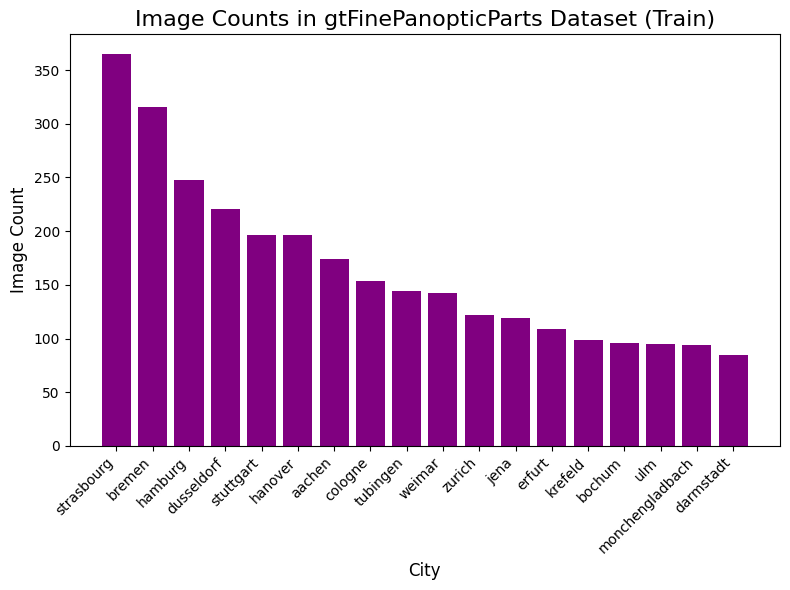

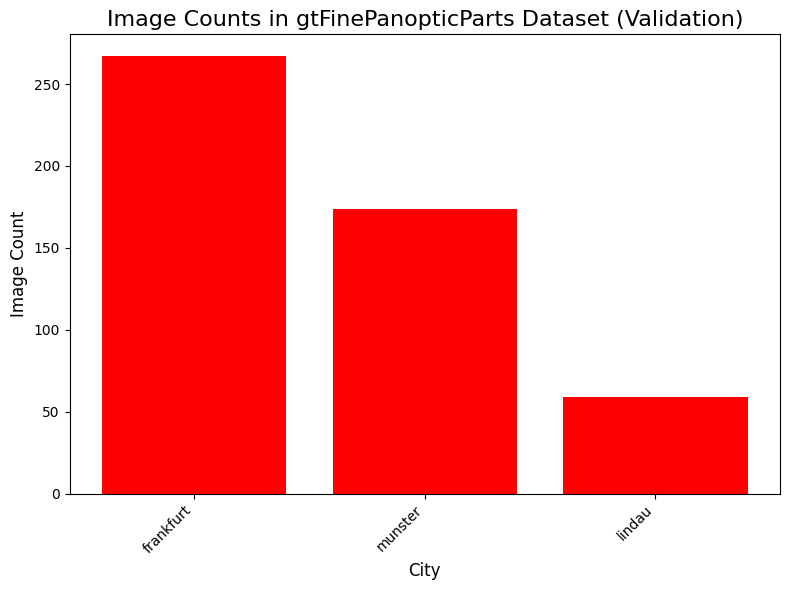

In [11]:
# Visualize cities name and the number of images per each unique ID
def gtFinePano_plot_city_counts(data, title, color):
    data.sort_values(by="ImageCounts", ascending=False, inplace=True)
    plt.figure(figsize=(8, 6))
    plt.bar(data["City"], data["ImageCounts"], color=color)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("ImageCounts", fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

# Plotting for gtFinePanopticParts dataset
print("Visualizing gtFinePanopticParts dataset image counts...")
gtFinePano_plot_city_counts(gtFinePano_city_trainImg_count, "Image Counts in gtFinePanopticParts Dataset (Train)", "purple")
gtFinePano_plot_city_counts(gtFinePano_city_valImg_count, "Image Counts in gtFinePanopticParts Dataset (Validation)", "red")

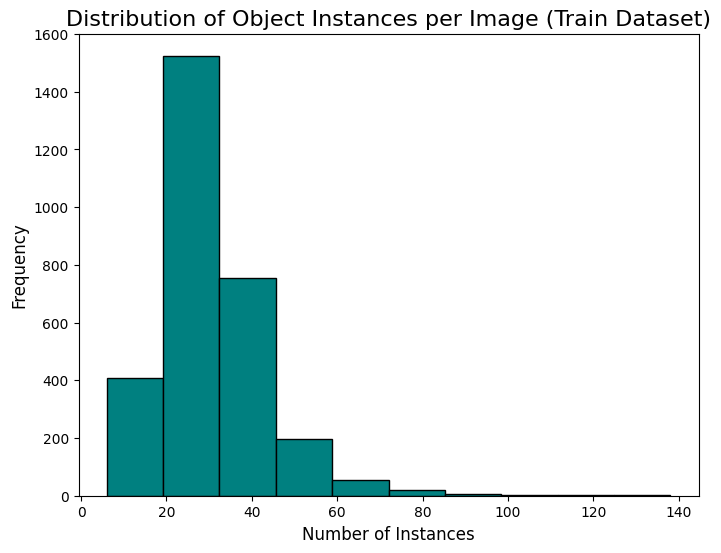

Instance Statistics Summary: {'Total Images': 2975, 'Mean Instances per Image': 30.721680672268906, 'Median Instances per Image': 29.0, 'Max Instances in an Image': 138, 'Min Instances in an Image': 6}


In [28]:
def analyze_instance_stats_in_train(gtFine_CorePath):
    """
    Analyze the instance statistics for all cities in the train folder.

    Args:
        gtFine_CorePath (str): Path to the gtFine dataset core folder.

    Returns:
        dict: A dictionary containing the number of instances for each city.
    """
    instance_counts = {}
    train_path = os.path.join(gtFine_CorePath, "train")

    # Loop through all cities in the train folder
    for city in os.listdir(train_path):
        city_path = os.path.join(train_path, city)
        if not os.path.isdir(city_path):
            continue

        # Get instance image paths for the city
        instance_image_paths = [
            os.path.join(city_path, file)
            for file in os.listdir(city_path)
            if "_gtFine_instanceIds.png" in file
        ]

        # Count instances for each image
        city_instance_counts = []
        for img_path in instance_image_paths:
            instance_mask = np.array(Image.open(img_path))
            unique_ids = np.unique(instance_mask)
            city_instance_counts.append(len(unique_ids) - 1)  # Exclude background (id=0)

        # Store results
        instance_counts[city] = city_instance_counts

    return instance_counts

# Analyze instance statistics for all cities in the train folder
train_instance_counts = analyze_instance_stats_in_train(gtFine_CorePath)

# Flatten instance counts across all cities
all_instance_counts = [count for city_counts in train_instance_counts.values() for count in city_counts]

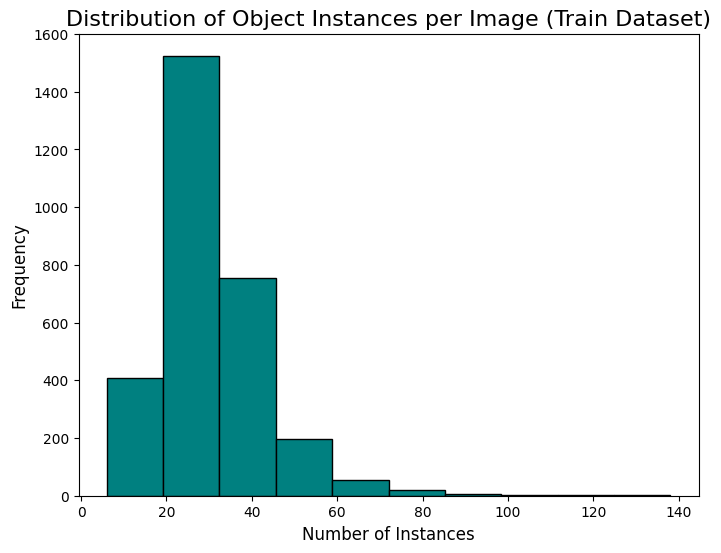

,Statistic,Value
0,Total Images,2975.000000
1,Mean Instances per Image,30.721681
2,Median Instances per Image,29.000000
3,Max Instances in an Image,138.000000
4,Min Instances in an Image,6.000000


In [30]:
# Plot the distribution of instances
plt.figure(figsize=(8, 6))
plt.hist(all_instance_counts, bins=10, color='teal', edgecolor='black')
plt.title("Distribution of Object Instances per Image (Train Dataset)", fontsize=16)
plt.xlabel("Number of Instances", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Display summary statistics
instance_summary = {
    "Total Images": len(all_instance_counts),
    "Mean Instances per Image": np.mean(all_instance_counts),
    "Median Instances per Image": np.median(all_instance_counts),
    "Max Instances in an Image": np.max(all_instance_counts),
    "Min Instances in an Image": np.min(all_instance_counts),
}
# print("Instance Statistics Summary:", instance_summary)
instance_summary_pd = pd.DataFrame(list(instance_summary.items()), columns=["Statistic", "Value"])
instance_summary_pd

In [12]:
# # Load a sample instance mask and analyze unique IDs
# sample_instance_array = np.array(instance_image)
# unique_instance_ids = np.unique(sample_instance_array)
# instance_id_count = Counter(sample_instance_array.flatten())

# # Summary of dataset structure and annotations
# gtFine_train_counts_summary = len(gtFine_city_trainImg_count), sum(gtFine_city_trainImg_count.values())
# gtFine_val_counts_summary = len(gtFine_val_counts), sum(gtFine_val_counts.values())
# gtFine_test_counts_summary = len(gtFine_test_counts), sum(gtFine_test_counts.values())
# gtFinePanopticParts_train_counts_summary = len(gtFinePano_train_counts), sum(gtFinePano_train_counts.values())
# gtFinePanopticParts_val_counts_summary = len(gtFinePano_val_counts), sum(gtFinePano_val_counts.values())

# (gtFine_train_counts_summary, gtFine_val_counts_summary, gtFine_test_counts_summary,
#  gtFinePanopticParts_train_counts_summary, gtFinePanopticParts_val_counts_summary,
#  unique_instance_ids[:10], instance_id_count.most_common(5))